In [7]:
import pandas as pd

file_path = r"C:\Users\pirag\Documents\Data_Crunch_Competition\modified_temperatures_with_coordinates_updated.csv"

df = pd.read_csv(file_path)


In [2]:
df.head()

,kingdom_encoded,Year,Month_sin,Month_cos,Day_sin,Day_cos,latitude_sin,latitude_cos,longitude_sin,longitude_cos,Avg_Temperature,Avg_Feels_Like_Temperature,Temperature_Range,Feels_Like_Temperature_Range,Radiation,Rain_Amount,Rain_Duration,Wind_Speed,Wind_Direction,Evapotranspiration
0,0,1,0.866025,-0.5,0.201299,0.97953,0.411196,0.911547,-0.605016,0.796213,25.5,30.5,8.5,10.3,22.52,58.89,16,8.6,283,1.648659
1,1,1,0.866025,-0.5,0.201299,0.97953,0.390410,0.920641,-0.606405,0.795156,26.5,32.0,5.9,8.2,22.73,11.83,12,15.8,161,1.583094
2,2,1,0.866025,-0.5,0.201299,0.97953,0.388802,0.921321,-0.603626,0.797268,26.3,31.5,5.2,6.4,22.73,11.83,12,15.8,161,1.593309
3,3,1,0.866025,-0.5,0.201299,0.97953,0.409605,0.912263,-0.600839,0.799370,24.0,28.4,8.2,10.7,22.67,75.27,16,6.4,346,1.638997
4,4,1,0.866025,-0.5,0.201299,0.97953,0.434917,0.900471,-0.609177,0.793034,28.0,32.8,5.7,10.2,22.35,4.81,8,16.7,185,1.719189


In [3]:
# Select the target columns
target_columns = ['Avg_Temperature', 'Avg_Feels_Like_Temperature', 'Temperature_Range', 
                  'Feels_Like_Temperature_Range', 'Radiation', 'Rain_Amount', 
                  'Rain_Duration', 'Wind_Speed', 'Wind_Direction', 'Evapotranspiration']

# Compute min and max values
target_min = df[target_columns].min()
target_max = df[target_columns].max()

# Create a DataFrame for better visualization
target_range = pd.DataFrame({'Min': target_min, 'Max': target_max})
print(target_range)


                                    Min        Max
Avg_Temperature               17.200000   31.50000
Avg_Feels_Like_Temperature    16.300000   37.40000
Temperature_Range              0.500000   15.40000
Feels_Like_Temperature_Range   0.800000   17.30000
Radiation                      3.190000   30.10000
Rain_Amount                    0.000000  440.44000
Rain_Duration                  0.000000   24.00000
Wind_Speed                     2.300000   50.20000
Wind_Direction                 0.000000  359.00000
Evapotranspiration             0.425268    2.21266


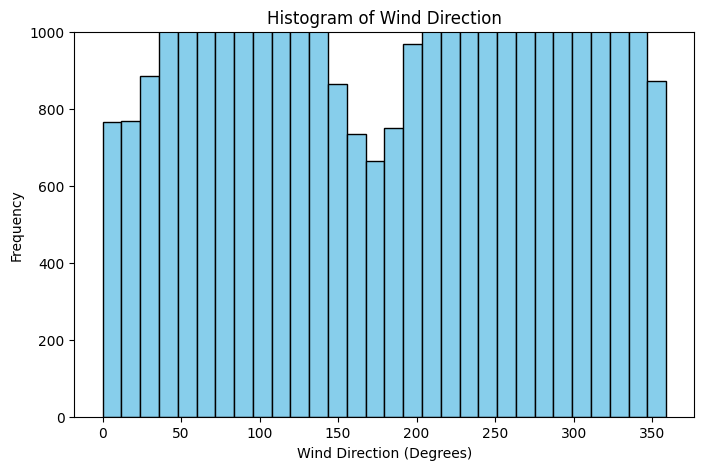

In [6]:
import matplotlib.pyplot as plt

# Plot histogram for Wind_Direction
plt.figure(figsize=(8, 5))
plt.hist(df['Wind_Direction'], bins=30, color='skyblue', edgecolor='black')

# Labels and title
plt.xlabel('Wind Direction (Degrees)')
plt.ylabel('Frequency')
plt.title('Histogram of Wind Direction')
plt.ylim([0,1000])

# Show the plot
plt.show()


In [7]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Example DataFrame with features and multi-output targets
# Let's assume 'df' contains your dataset with features and target columns

# Features
X = df[['kingdom_encoded', 'Year', 'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos', 
                       'latitude_sin', 'latitude_cos', 'longitude_sin', 'longitude_cos']]

# Targets (multi-output)
y = df[['Avg_Temperature', 'Radiation', 'Rain_Amount', 'Wind_Speed', 'Wind_Direction']]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train the model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error for each target
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
print(f"Mean Squared Error for each target: {mse}")

# Function to calculate SMAPE
def smape(y_true, y_pred):
    denominator = np.abs(y_true) + np.abs(y_pred)
    diff = np.abs(y_true - y_pred) / (denominator / 2.0)
    # Handle cases where the denominator is zero to avoid division by zero
    diff = np.where(denominator == 0, 0.0, diff)
    return 100 * np.mean(diff)

# Calculate SMAPE for each target
smapes = np.apply_along_axis(lambda x: smape(x[0], x[1]), 1, np.column_stack((y_test, y_pred)))

print(f"SMAPE for each target: {smapes}")


Mean Squared Error for each target: [2.9017395e-01 7.4410024e+00 1.2366674e+02 1.0398499e+01 2.8622095e+03]
SMAPE for each target: [80.26845638 33.09230115  8.83246916 ...  0.51603391 28.73658134
  9.30232558]


In [8]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Example DataFrame with features and multi-output targets
# Let's assume 'df' contains your dataset with features and target columns

# Features
X = df[['kingdom_encoded', 'Year', 'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos', 
                       'latitude_sin', 'latitude_cos', 'longitude_sin', 'longitude_cos']]

# Targets (multi-output)
y = df[['Avg_Temperature', 'Radiation', 'Rain_Amount', 'Wind_Speed', 'Wind_Direction']]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train the model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error for each target
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
print(f"Mean Squared Error for each target: {mse}")

# Function to calculate SMAPE for each target
def smape(y_true, y_pred):
    denominator = np.abs(y_true) + np.abs(y_pred)
    diff = np.abs(y_true - y_pred) / (denominator / 2.0)
    # Handle cases where the denominator is zero to avoid division by zero
    diff = np.where(denominator == 0, 0.0, diff)
    return 100 * np.mean(diff)

# Calculate SMAPE for each target
smapes = np.apply_along_axis(lambda x: smape(x[0], x[1]), 1, np.column_stack((y_test, y_pred)))

# Calculate the average SMAPE value
average_smapes = np.mean(smapes)
print(f"Average SMAPE across all targets: {average_smapes}")


Mean Squared Error for each target: [2.9017395e-01 7.4410024e+00 1.2366674e+02 1.0398499e+01 2.8622095e+03]
Average SMAPE across all targets: 28.068018336074754


In [9]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Example DataFrame with features and multi-output targets
# Let's assume 'df' contains your dataset with features and target columns

# Features
X = df[['kingdom_encoded', 'Year', 'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos', 
                       'latitude_sin', 'latitude_cos', 'longitude_sin', 'longitude_cos']]

# Targets (multi-output)
y = df[['Avg_Temperature', 'Avg_Feels_Like_Temperature', 'Temperature_Range', 
                   'Feels_Like_Temperature_Range', 'Radiation', 'Rain_Amount', 
                   'Rain_Duration', 'Wind_Speed', 'Wind_Direction', 'Evapotranspiration']]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train the model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error for each target
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
print(f"Mean Squared Error for each target: {mse}")

# Function to calculate SMAPE for each target
def smape(y_true, y_pred):
    denominator = np.abs(y_true) + np.abs(y_pred)
    diff = np.abs(y_true - y_pred) / (denominator / 2.0)
    # Handle cases where the denominator is zero to avoid division by zero
    diff = np.where(denominator == 0, 0.0, diff)
    return 100 * np.mean(diff)

# Calculate SMAPE for each target
smapes = np.apply_along_axis(lambda x: smape(x[0], x[1]), 1, np.column_stack((y_test, y_pred)))

# Calculate the average SMAPE value
average_smapes = np.mean(smapes)
print(f"Average SMAPE across all targets: {average_smapes}")


Mean Squared Error for each target: [2.8432941e-01 7.0792896e-01 9.5477903e-01 1.9074178e+00 7.6378436e+00
 1.2594257e+02 2.0389891e+01 1.0716385e+01 2.8978740e+03 2.0516625e-02]
Average SMAPE across all targets: 14.45728927619947


In [ ]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Example DataFrame with features and multi-output targets
# Let's assume 'df' contains your dataset with features and target columns

# Features
X = df[['kingdom_encoded', 'Year', 'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos', 
        'latitude_sin', 'latitude_cos', 'longitude_sin', 'longitude_cos']]

# Targets (multi-output)
y = df[['Avg_Temperature', 'Avg_Feels_Like_Temperature', 'Temperature_Range', 
        'Feels_Like_Temperature_Range', 'Radiation', 'Rain_Amount', 
        'Rain_Duration', 'Wind_Speed', 'Wind_Direction', 'Evapotranspiration']]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# Instantiate and train the model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.5)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error for each target
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
print(f"Mean Squared Error for each target: {mse}")

# Function to calculate SMAPE for each target
def smape(y_true, y_pred):
    denominator = np.abs(y_true) + np.abs(y_pred)
    diff = np.abs(y_true - y_pred) / (denominator / 2.0)
    diff = np.where(denominator == 0, 0.0, diff)  # Handle division by zero
    return 100 * np.mean(diff)

# Calculate SMAPE for each target separately
smapes = [smape(y_test.iloc[:, i], y_pred[:, i]) for i in range(y.shape[1])]

# Print SMAPE for each target variable
for col, smape_value in zip(y.columns, smapes):
    print(f"SMAPE for {col}: {smape_value}")


# Select specific target columns
selected_columns = ['Avg_Temperature', 'Radiation', 'Rain_Amount', 'Wind_Speed', 'Wind_Direction']

# Compute SMAPE only for the selected target variables
selected_smapes = [smape(y_test[col], y_pred[:, i]) for i, col in enumerate(y.columns) if col in selected_columns]

# Compute the average SMAPE for the selected target variables
average_selected_smapes = np.mean(selected_smapes)

print(f"Average SMAPE for selected targets: {average_selected_smapes}")


Mean Squared Error for each target: [1.6024807e-01 3.6757746e-01 5.8207518e-01 1.3679903e+00 3.7302921e+00
 8.3477882e+01 1.3381040e+01 6.6837268e+00 2.2355002e+03 9.9619851e-03]
SMAPE for Avg_Temperature: 1.179163217112276
SMAPE for Avg_Feels_Like_Temperature: 1.5250558878574692
SMAPE for Temperature_Range: 11.390550408250744
SMAPE for Feels_Like_Temperature_Range: 15.440119602876043
SMAPE for Radiation: 7.768784348106348
SMAPE for Rain_Amount: 96.76343295237135
SMAPE for Rain_Duration: 67.29484989908204
SMAPE for Wind_Speed: 13.663289034354928
SMAPE for Wind_Direction: 19.62852087441984
SMAPE for Evapotranspiration: 4.919408558613435
Average SMAPE for selected targets: 27.800638085272947


In [11]:
pip uninstall numpy

^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install numpy

In [12]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Example DataFrame with features and multi-output targets
# Let's assume 'df' contains your dataset with features and target columns

# Features
X = df[['kingdom_encoded', 'Year', 'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos', 
        'latitude_sin', 'latitude_cos', 'longitude_sin', 'longitude_cos']]

# Targets (multi-output)
y = df[['Avg_Temperature', 'Avg_Feels_Like_Temperature', 'Temperature_Range', 
        'Feels_Like_Temperature_Range', 'Radiation', 'Rain_Amount', 
        'Rain_Duration', 'Wind_Speed', 'Wind_Direction', 'Evapotranspiration']]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# Instantiate and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error for each target
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
print(f"Mean Squared Error for each target: {mse}")

# Function to calculate SMAPE for each target
def smape(y_true, y_pred):
    denominator = np.abs(y_true) + np.abs(y_pred)
    diff = np.abs(y_true - y_pred) / (denominator / 2.0)
    diff = np.where(denominator == 0, 0.0, diff)  # Handle division by zero
    return 100 * np.mean(diff)

# Calculate SMAPE for each target separately
smapes = [smape(y_test.iloc[:, i], y_pred[:, i]) for i in range(y.shape[1])]

# Print SMAPE for each target variable
for col, smape_value in zip(y.columns, smapes):
    print(f"SMAPE for {col}: {smape_value}")

# Select specific target columns
selected_columns = ['Avg_Temperature', 'Radiation', 'Rain_Amount', 'Wind_Speed', 'Wind_Direction']

# Compute SMAPE only for the selected target variables
selected_smapes = [smape(y_test[col], y_pred[:, i]) for i, col in enumerate(y.columns) if col in selected_columns]

# Compute the average SMAPE for the selected target variables
average_selected_smapes = np.mean(selected_smapes)

print(f"Average SMAPE for selected targets: {average_selected_smapes}")


Mean Squared Error for each target: [2.04575128e-01 3.88843330e-01 3.91809808e-01 8.01174038e-01
 2.54700631e+00 5.13931732e+01 6.94709251e+00 3.68475236e+00
 1.07542367e+03 5.98740509e-03]
SMAPE for Avg_Temperature: 1.0831752209937189
SMAPE for Avg_Feels_Like_Temperature: 1.3195941367800172
SMAPE for Temperature_Range: 8.111577104736549
SMAPE for Feels_Like_Temperature_Range: 10.07126872014859
SMAPE for Radiation: 5.128392614333192
SMAPE for Rain_Amount: 65.56508048710043
SMAPE for Rain_Duration: 51.3796682177254
SMAPE for Wind_Speed: 8.508175225612389
SMAPE for Wind_Direction: 9.911357400769875
SMAPE for Evapotranspiration: 3.027659809630974
Average SMAPE for selected targets: 18.039236189761922


Mean Squared Error for each target: [1.6024807e-01 3.6757746e-01 5.8207518e-01 1.3679903e+00 3.7302921e+00
 8.3477882e+01 1.3381040e+01 6.6837268e+00 2.2355002e+03 9.9619851e-03]
SMAPE for Avg_Temperature: 1.179163217112276
SMAPE for Avg_Feels_Like_Temperature: 1.5250558878574692
SMAPE for Temperature_Range: 11.390550408250744
SMAPE for Feels_Like_Temperature_Range: 15.440119602876043
SMAPE for Radiation: 7.768784348106348
SMAPE for Rain_Amount: 96.76343295237135
SMAPE for Rain_Duration: 67.29484989908204
SMAPE for Wind_Speed: 13.663289034354928
SMAPE for Wind_Direction: 19.62852087441984
SMAPE for Evapotranspiration: 4.919408558613435
Average SMAPE for selected targets: 27.800638085272947

In [12]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

# Define SMAPE function for scoring
def smape(y_true, y_pred):
    denominator = np.abs(y_true) + np.abs(y_pred)
    diff = np.abs(y_true - y_pred) / (denominator / 2.0)
    diff = np.where(denominator == 0, 0.0, diff)  # Handle division by zero
    return 100 * np.mean(diff)

# Load Data
X = df[['kingdom_encoded', 'Year', 'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos', 
        'latitude_sin', 'latitude_cos', 'longitude_sin', 'longitude_cos']]
y = df[['Avg_Temperature', 'Avg_Feels_Like_Temperature', 'Temperature_Range', 
        'Feels_Like_Temperature_Range', 'Radiation', 'Rain_Amount', 
        'Rain_Duration', 'Wind_Speed', 'Wind_Direction', 'Evapotranspiration']]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# Define XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Parameter Grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.3, 0.5],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

# Custom scorer for SMAPE
smape_scorer = make_scorer(smape, greater_is_better=False)

# Grid Search
grid_search = GridSearchCV(xgb_model, param_grid, scoring=smape_scorer, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best Parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the Best Model
best_model = xgb.XGBRegressor(**best_params, objective='reg:squarederror')
best_model.fit(X_train, y_train)

# Predict
y_pred = best_model.predict(X_test)

# Compute MSE
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
print(f"Mean Squared Error for each target: {mse}")

# Compute SMAPE for each target
smapes = [smape(y_test.iloc[:, i], y_pred[:, i]) for i in range(y.shape[1])]
for col, smape_value in zip(y.columns, smapes):
    print(f"SMAPE for {col}: {smape_value}")

# Compute Average SMAPE for Selected Targets
selected_columns = ['Avg_Temperature', 'Radiation', 'Rain_Amount', 'Wind_Speed', 'Wind_Direction']
selected_smapes = [smape(y_test[col], y_pred[:, i]) for i, col in enumerate(y.columns) if col in selected_columns]
average_selected_smapes = np.mean(selected_smapes)

print(f"Average SMAPE for selected targets: {average_selected_smapes}")


Fitting 3 folds for each of 144 candidates, totalling 432 fits


c:\Users\pirag\.conda\envs\env_com\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
12 fits failed out of a total of 432.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\pirag\.conda\envs\env_com\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\pirag\.conda\envs\env_com\lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
  File "c:\Users\pirag\.conda\envs\env_com\lib\site-packages\xgboost\sklearn.py", line 1143, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
  File "c:

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Mean Squared Error for each target: [1.0545855e-01 2.3458835e-01 4.2855525e-01 9.8594695e-01 2.2982495e+00
 6.3861126e+01 9.3454762e+00 4.8236237e+00 1.7741011e+03 6.2757051e-03]
SMAPE for Avg_Temperature: 0.9316728227582832
SMAPE for Avg_Feels_Like_Temperature: 1.2082645955488343
SMAPE for Temperature_Range: 9.769092091367032
SMAPE for Feels_Like_Temperature_Range: 13.01201836731706
SMAPE for Radiation: 5.989251205519888
SMAPE for Rain_Amount: 92.44731556932291
SMAPE for Rain_Duration: 62.796436982184936
SMAPE for Wind_Speed: 11.54503614519959
SMAPE for Wind_Direction: 17.24319145654085
SMAPE for Evapotranspiration: 3.8152974333246026
Average SMAPE for selected targets: 25.6312934398683


In [20]:
df = df[df["Rain_Amount"] <= 150].reset_index(drop=True)


In [25]:
df.shape

(84960, 20)

In [24]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Example DataFrame with features and multi-output targets
# Let's assume 'df' contains your dataset with features and target columns

# Features
X = df[['kingdom_encoded', 'Year', 'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos', 
        'latitude_sin', 'latitude_cos', 'longitude_sin', 'longitude_cos']]

# Targets (multi-output)
y = df[['Avg_Temperature', 'Avg_Feels_Like_Temperature', 'Temperature_Range', 
        'Feels_Like_Temperature_Range', 'Radiation', 'Rain_Amount', 
        'Rain_Duration', 'Wind_Speed', 'Wind_Direction', 'Evapotranspiration']]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# Instantiate and train the model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.5)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error for each target
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
print(f"Mean Squared Error for each target: {mse}")

# Function to calculate SMAPE for each target
def smape(y_true, y_pred):
    denominator = np.abs(y_true) + np.abs(y_pred)
    diff = np.abs(y_true - y_pred) / (denominator / 2.0)
    diff = np.where(denominator == 0, 0.0, diff)  # Handle division by zero
    return 100 * np.mean(diff)

# Calculate SMAPE for each target separately
smapes = [smape(y_test.iloc[:, i], y_pred[:, i]) for i in range(y.shape[1])]

# Print SMAPE for each target variable
for col, smape_value in zip(y.columns, smapes):
    print(f"SMAPE for {col}: {smape_value}")


# Select specific target columns
selected_columns = ['Avg_Temperature', 'Radiation', 'Rain_Amount', 'Wind_Speed', 'Wind_Direction']

# Compute SMAPE only for the selected target variables
selected_smapes = [smape(y_test[col], y_pred[:, i]) for i, col in enumerate(y.columns) if col in selected_columns]

# Compute the average SMAPE for the selected target variables
average_selected_smapes = np.mean(selected_smapes)

print(f"Average SMAPE for selected targets: {average_selected_smapes}")


Mean Squared Error for each target: [1.6024807e-01 3.6757746e-01 5.8207518e-01 1.3679903e+00 3.7302921e+00
 8.3477882e+01 1.3381040e+01 6.6837268e+00 2.2355002e+03 9.9619851e-03]
SMAPE for Avg_Temperature: 1.179163217112276
SMAPE for Avg_Feels_Like_Temperature: 1.5250558878574692
SMAPE for Temperature_Range: 11.390550408250744
SMAPE for Feels_Like_Temperature_Range: 15.440119602876043
SMAPE for Radiation: 7.768784348106348
SMAPE for Rain_Amount: 96.76343295237135
SMAPE for Rain_Duration: 67.29484989908204
SMAPE for Wind_Speed: 13.663289034354928
SMAPE for Wind_Direction: 19.62852087441984
SMAPE for Evapotranspiration: 4.919408558613435
Average SMAPE for selected targets: 27.800638085272947


In [ ]:
Mean Squared Error for each target: [1.5927656e-01 3.8461316e-01 6.2291831e-01 1.4193470e+00 3.5968955e+00
 6.0680206e+01 1.3120102e+01 6.7609420e+00 2.1416780e+03 9.7803408e-03]
SMAPE for Avg_Temperature: 1.1670361218249763
SMAPE for Avg_Feels_Like_Temperature: 1.5683389506326861
SMAPE for Temperature_Range: 11.626359575527225
SMAPE for Feels_Like_Temperature_Range: 15.6040343504257
SMAPE for Radiation: 7.557475495307144
SMAPE for Rain_Amount: 97.55474309858378
SMAPE for Rain_Duration: 67.36714953945503
SMAPE for Wind_Speed: 13.847108373831377
SMAPE for Wind_Direction: 19.2457558721074
SMAPE for Evapotranspiration: 4.8460641085582346
Average SMAPE for selected targets: 27.874423792330937

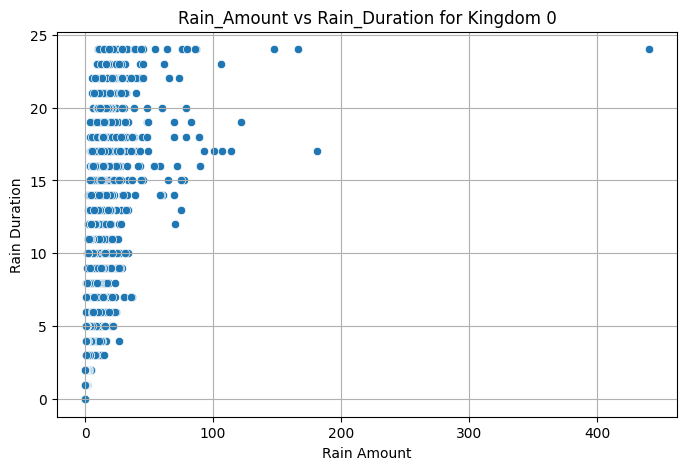

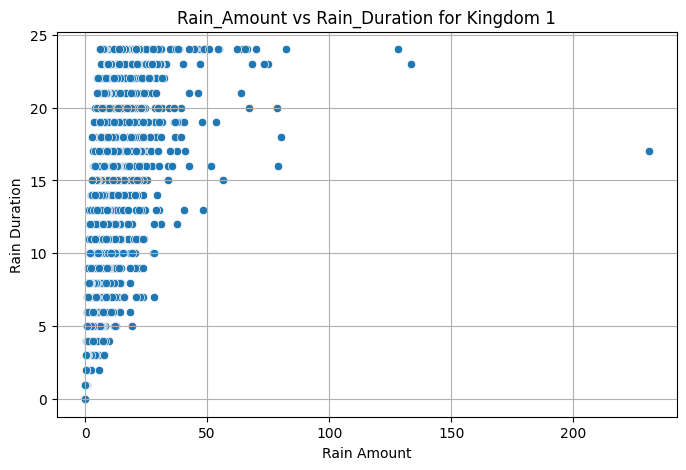

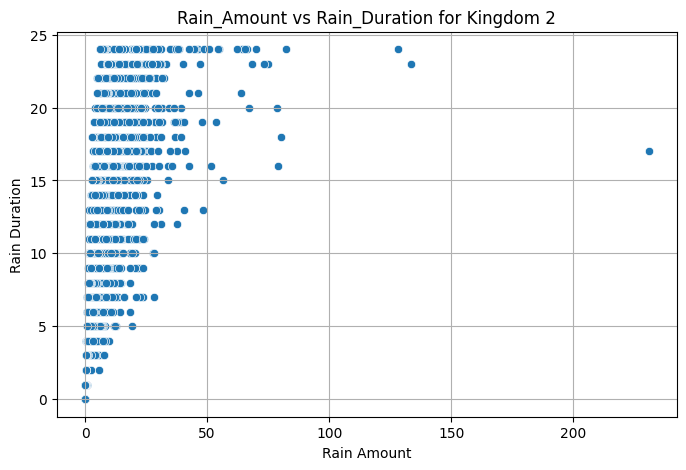

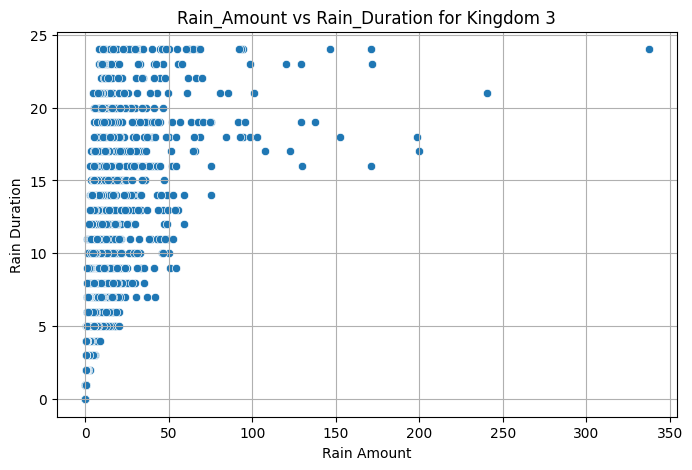

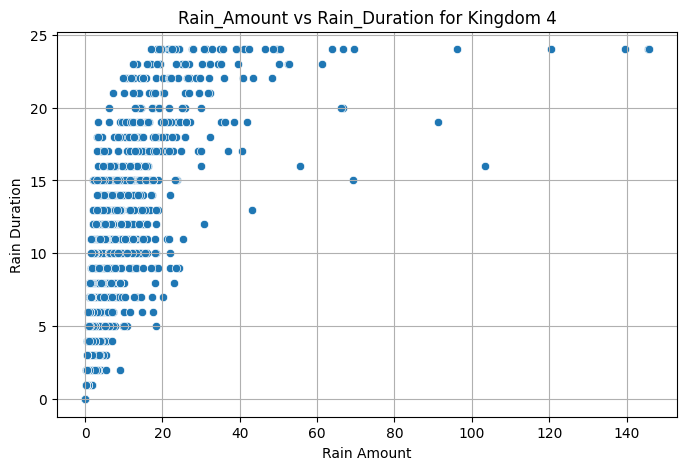

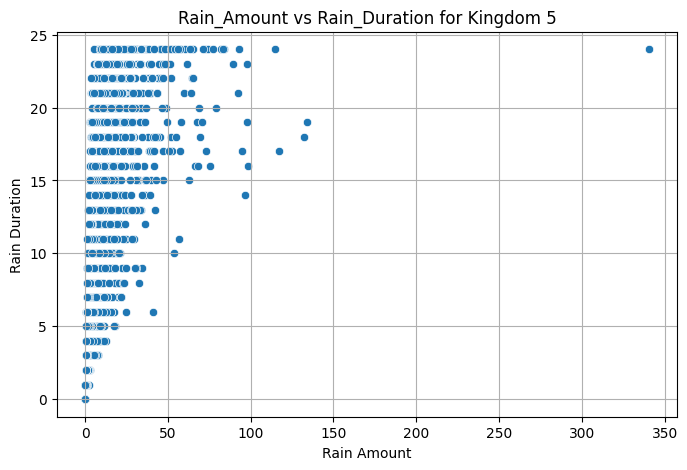

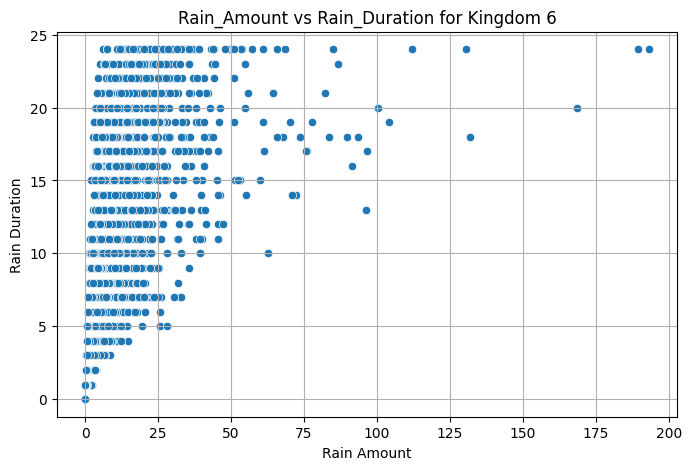

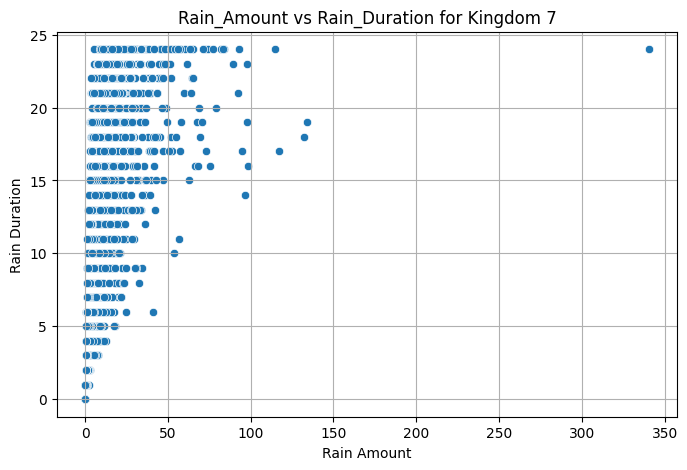

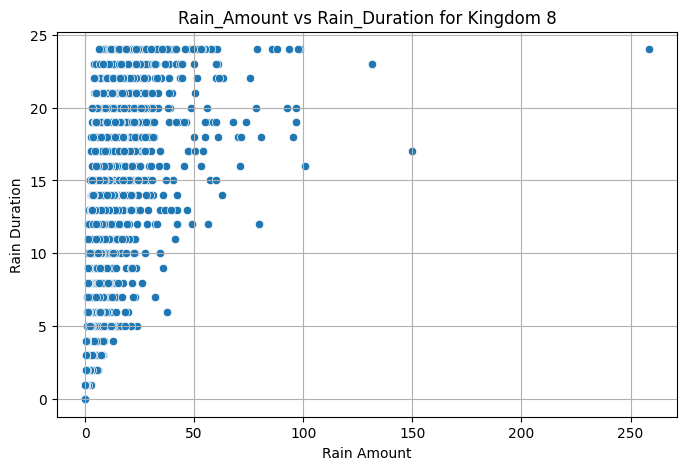

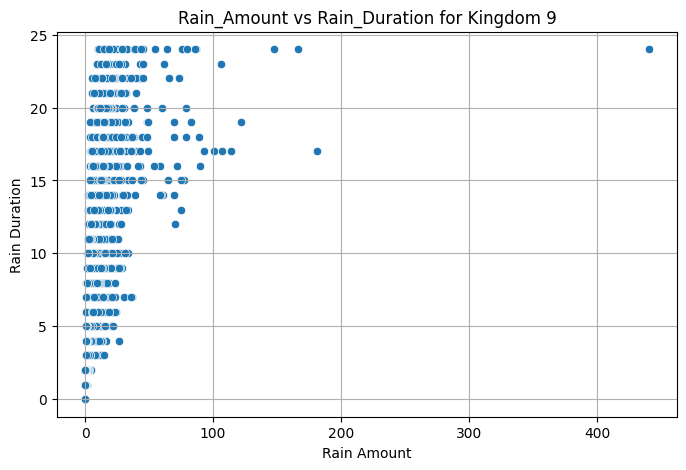

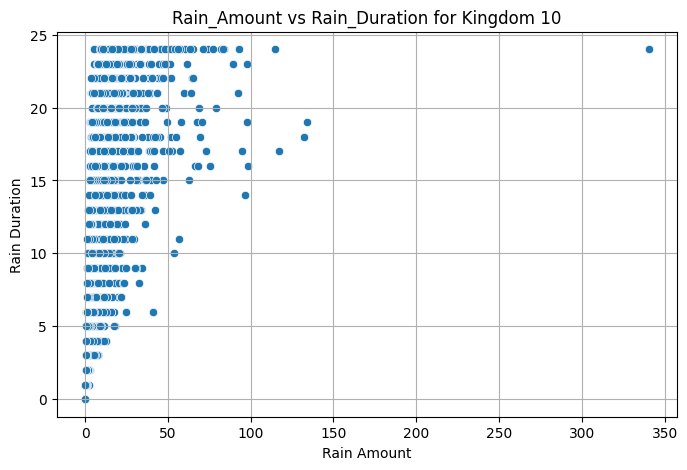

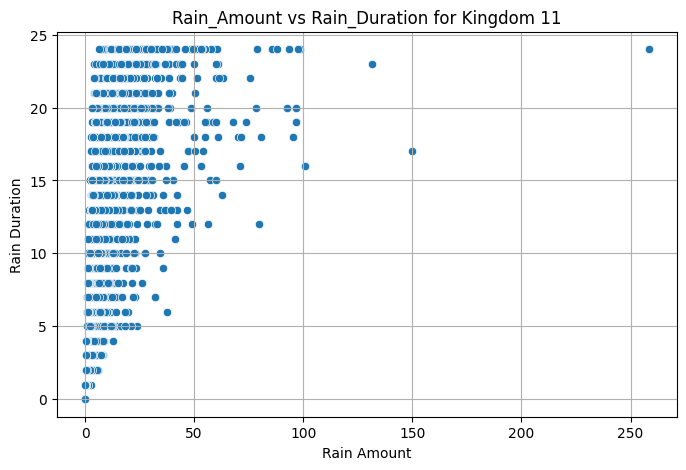

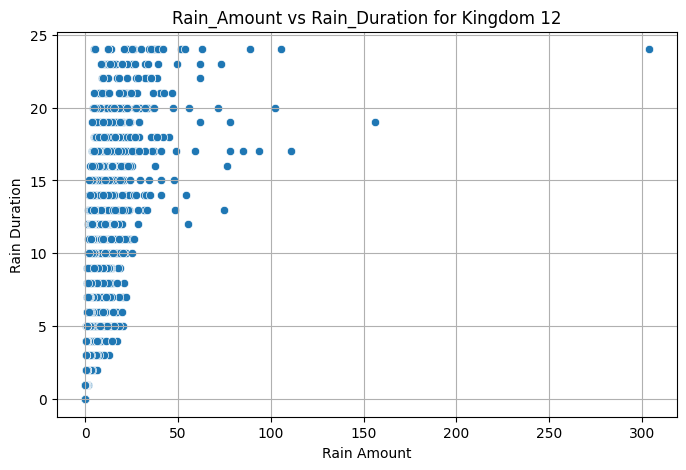

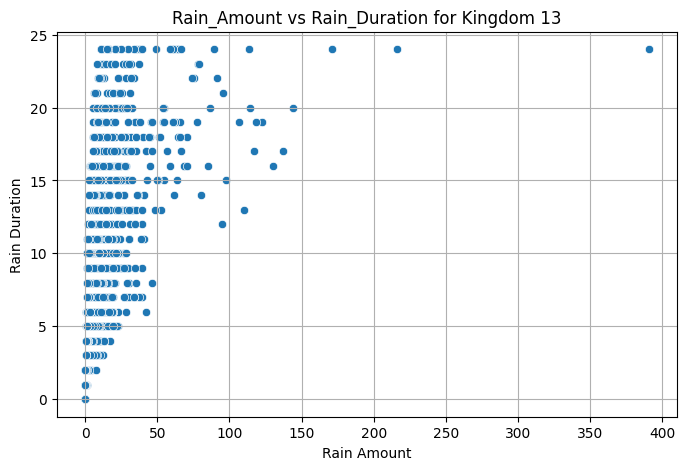

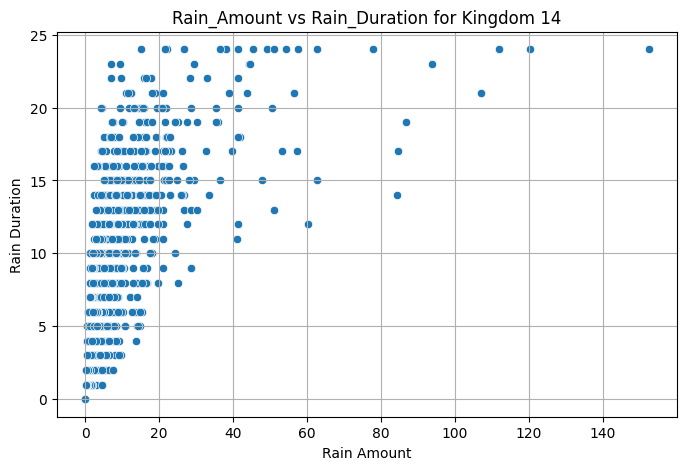

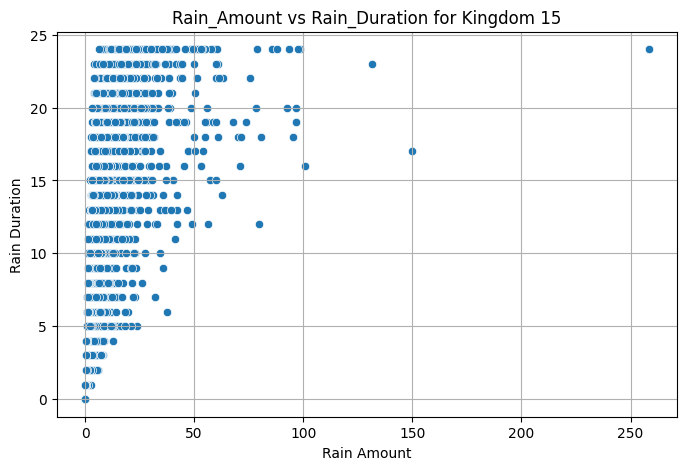

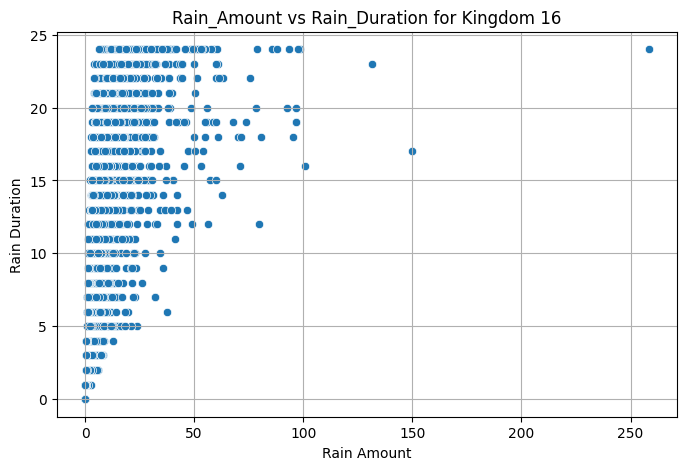

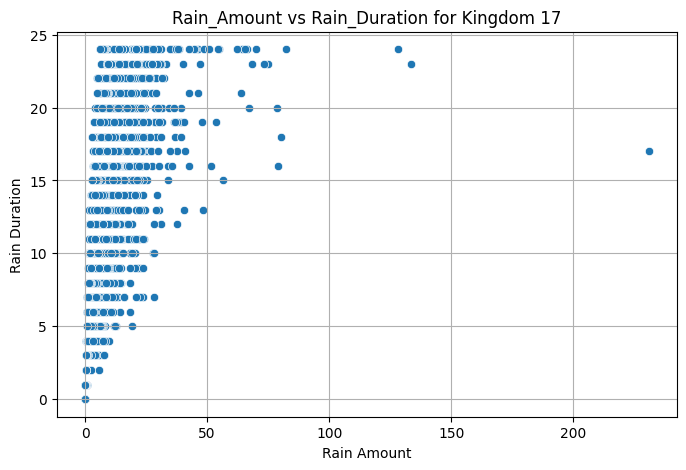

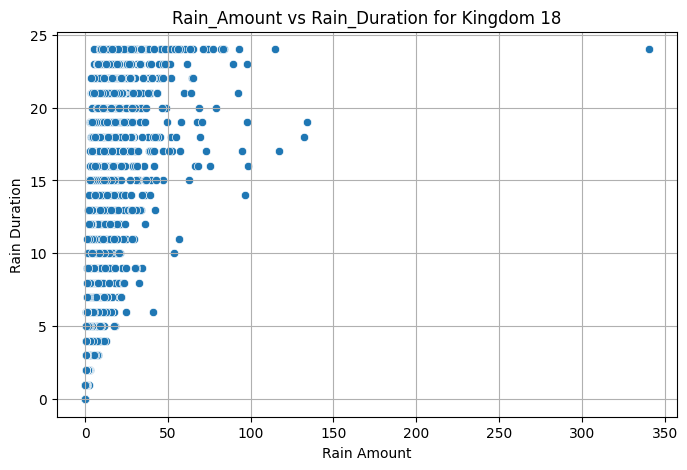

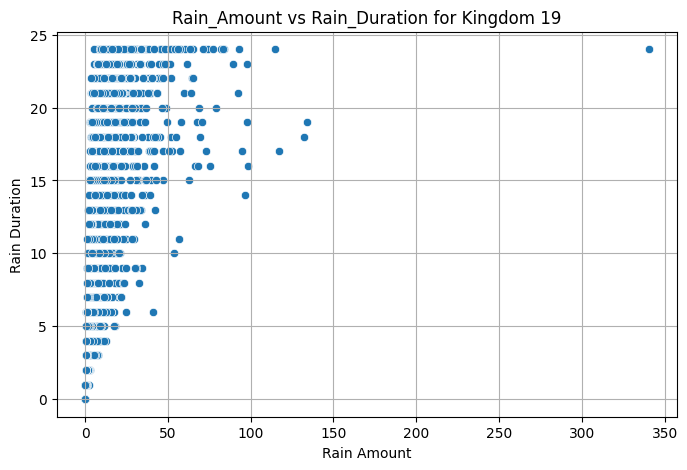

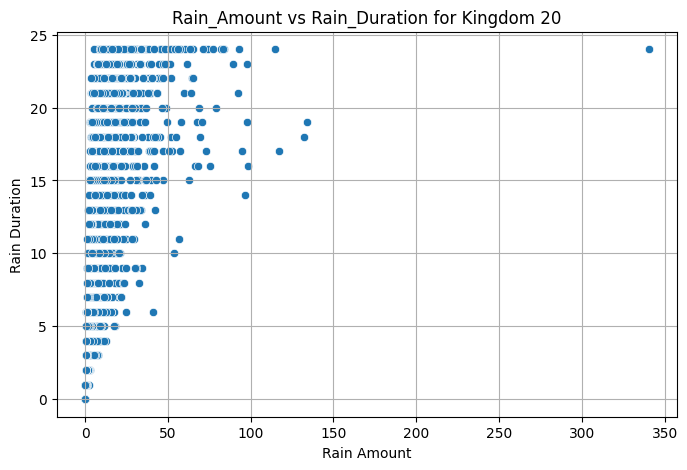

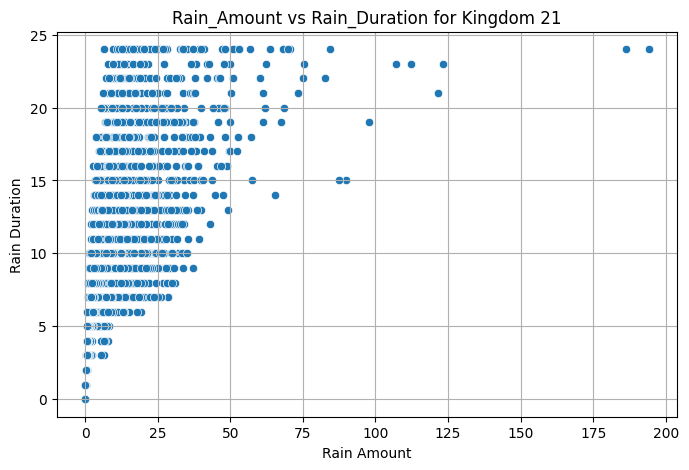

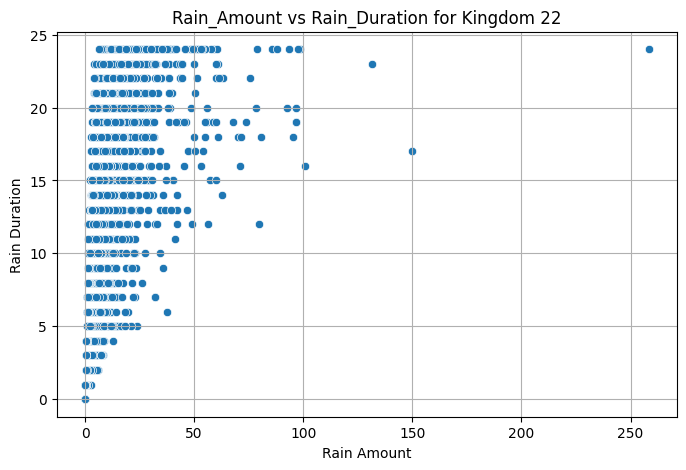

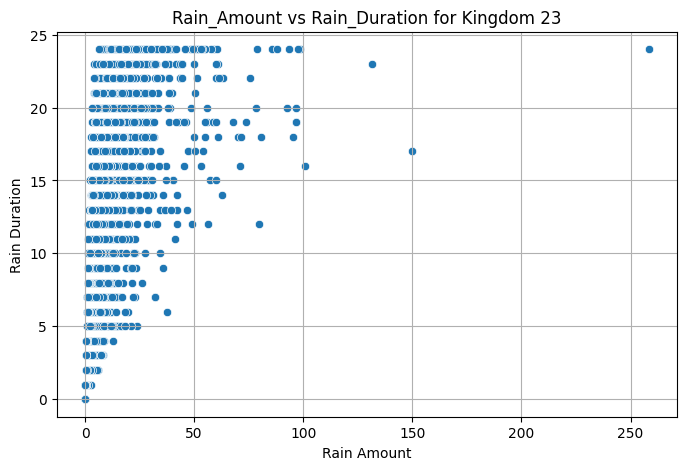

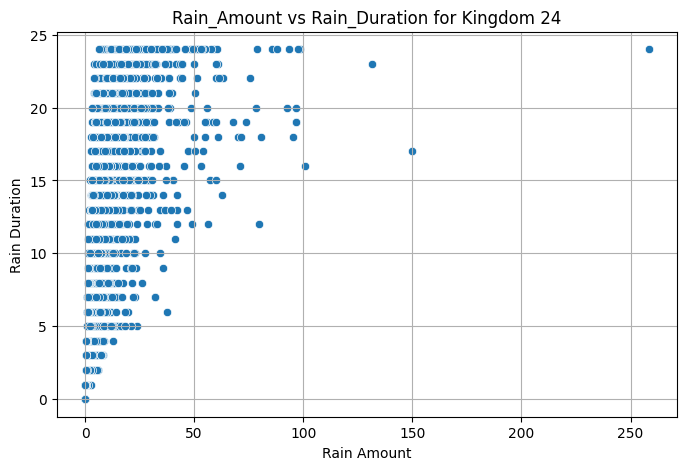

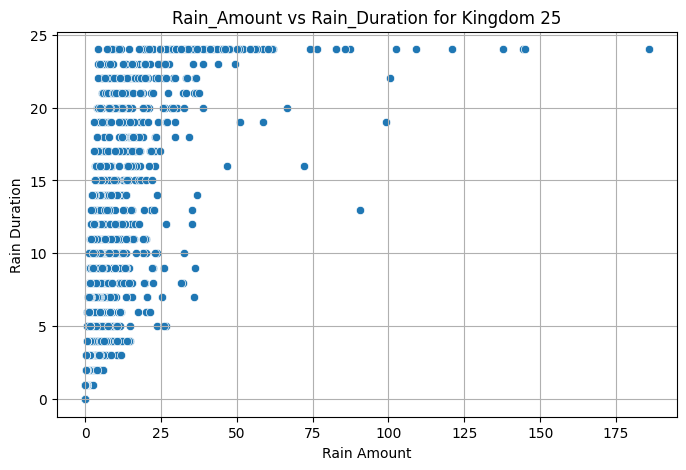

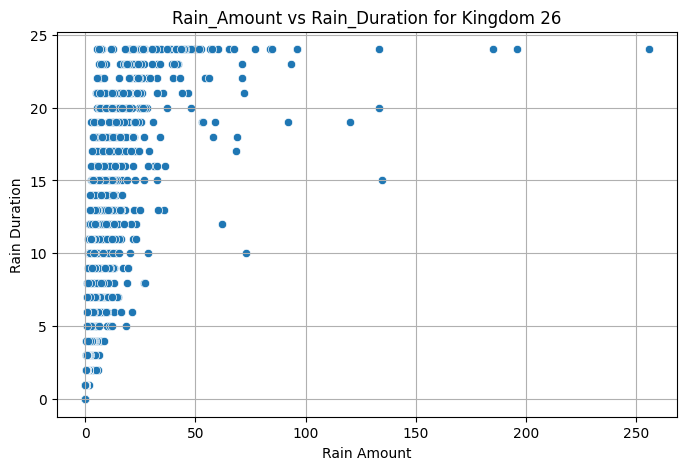

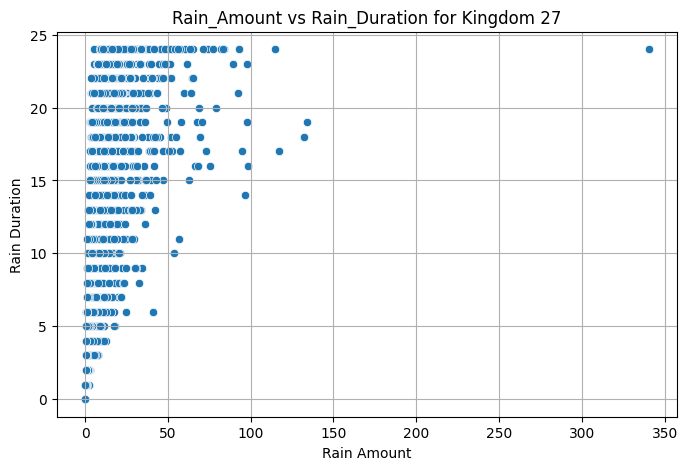

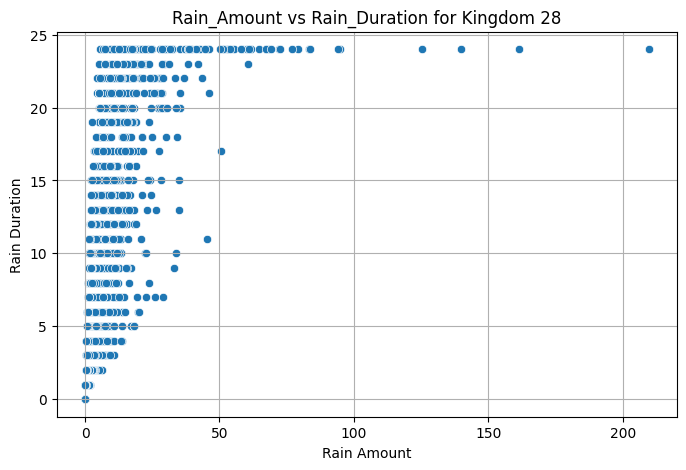

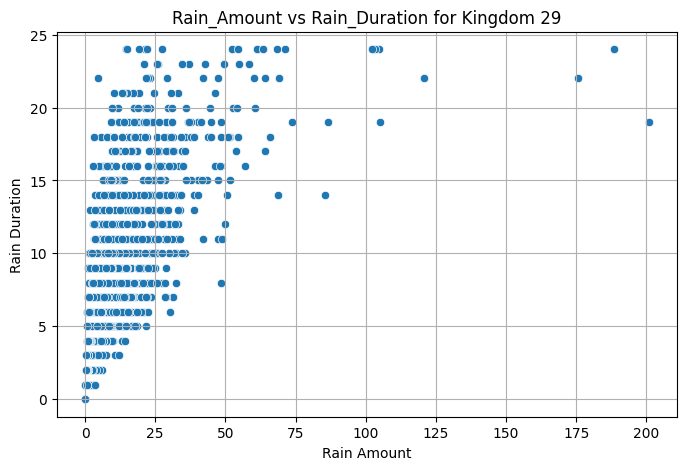

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique kingdom_encoded values
unique_kingdoms = df["kingdom_encoded"].unique()

# Create individual plots
for kingdom in unique_kingdoms:
    plt.figure(figsize=(8, 5))
    kingdom_data = df[df["kingdom_encoded"] == kingdom]  # Filter data for the kingdom
    sns.scatterplot(data=kingdom_data, x="Rain_Amount", y="Rain_Duration")
    
    # Titles and labels
    plt.title(f"Rain_Amount vs Rain_Duration for Kingdom {kingdom}")
    plt.xlabel("Rain Amount")
    plt.ylabel("Rain Duration")
    plt.grid(True)
    
    # Show plot
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique kingdom_encoded values
kingdoms = df["kingdom_encoded"].unique()

# Create individual plots for each kingdom
for kingdom in kingdoms:
    subset = df[df["kingdom_encoded"] == kingdom]
    
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=subset["Rain_Amount"], y=subset["Rain_Duration"])
    
    plt.title(f"Rain_Amount vs Rain_Duration for Kingdom {kingdom}")
    plt.xlabel("Rain Amount")
    plt.ylabel("Rain Duration")
    plt.grid(True)
    plt.show()


In [28]:
invalid_entries = df[(df["Rain_Amount"] == 0) & (df["Rain_Duration"] > 0)]


In [30]:
if not invalid_entries.empty:
    print("Found invalid entries:")
    print(invalid_entries)
else:
    print("No invalid entries found.")


No invalid entries found.


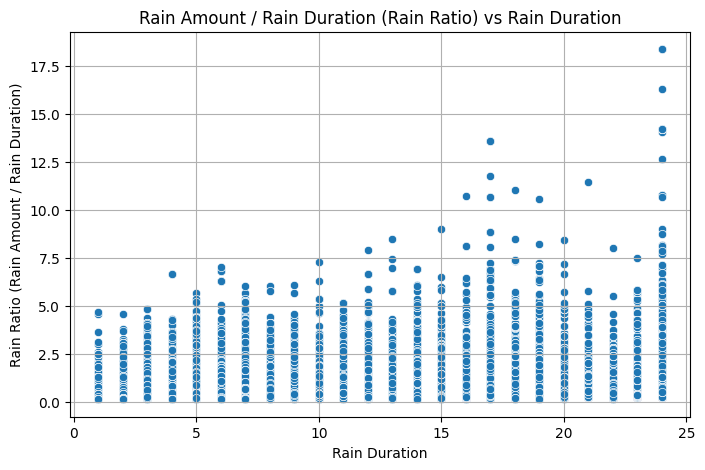

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add a new column for the ratio
df["Rain_Ratio"] = df["Rain_Amount"] / df["Rain_Duration"]

# Plotting Rain_Ratio
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Rain_Duration", y="Rain_Ratio")

# Titles and labels
plt.title("Rain Amount / Rain Duration (Rain Ratio) vs Rain Duration")
plt.xlabel("Rain Duration")
plt.ylabel("Rain Ratio (Rain Amount / Rain Duration)")
plt.grid(True)

# Show the plot
plt.show()
